In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [47]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
data = pd.read_csv('netflix1.csv')

In [3]:
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [4]:
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [5]:
data.drop_duplicates(inplace=True)

In [8]:
data.dropna(subset=['director',  'country'], inplace=True)

In [10]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [11]:
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States 2021-09-25          2020  PG-13    90 min   
1         France 2021-09-24          2021  TV-MA  1 Season   
2  United States 2021-09-24          2021  TV-MA  1 Season   
3         Brazil 2021-09-22          2021  TV-PG    91 min   
4  United States 2021-09-24          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [12]:
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [13]:
type_counts = data['type'].value_counts()

C:\Users\asus\AppData\Local\Temp\ipykernel_17796\3661394584.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


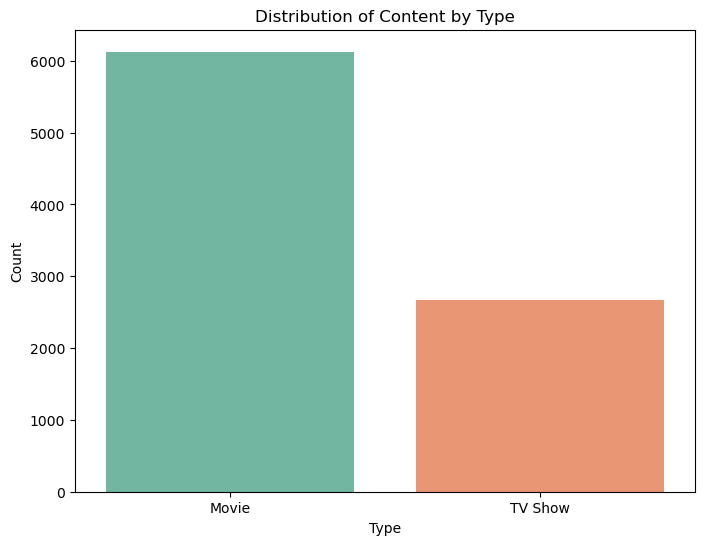

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [36]:
data['genres']= data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

C:\Users\asus\AppData\Local\Temp\ipykernel_17796\3416449402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


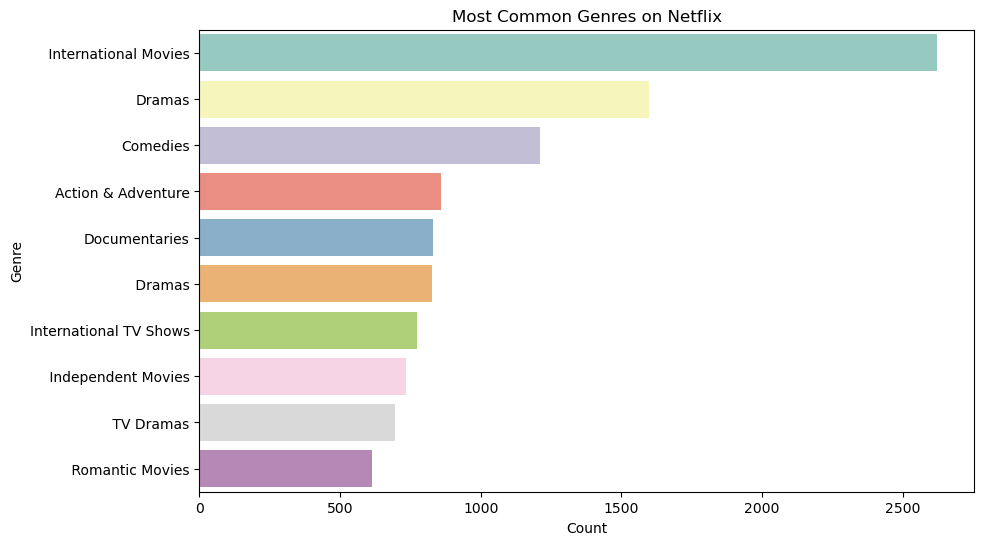

In [35]:

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [20]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

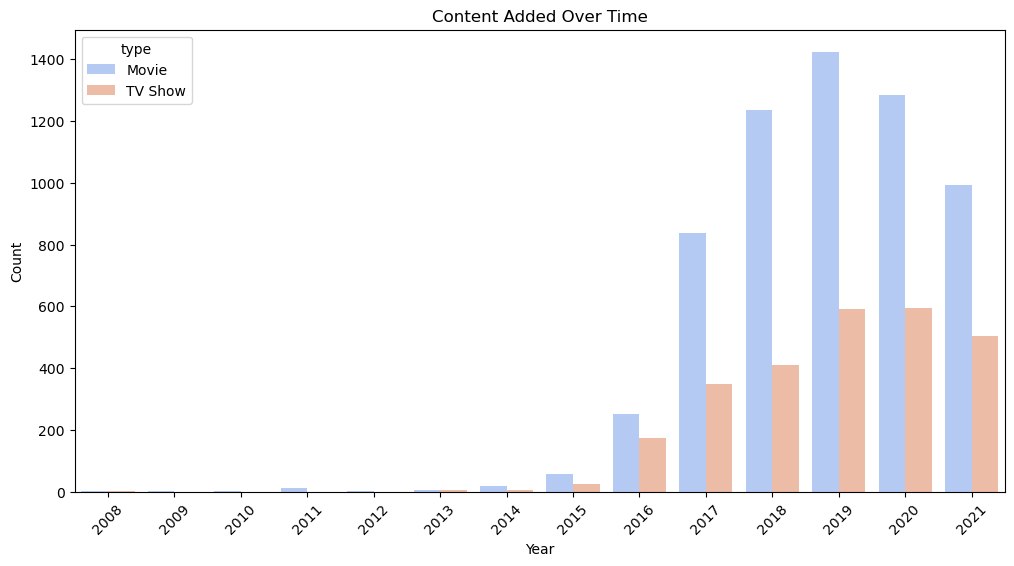

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='year_added',hue='type', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [37]:
top_directors = data['director'].value_counts().head(10)

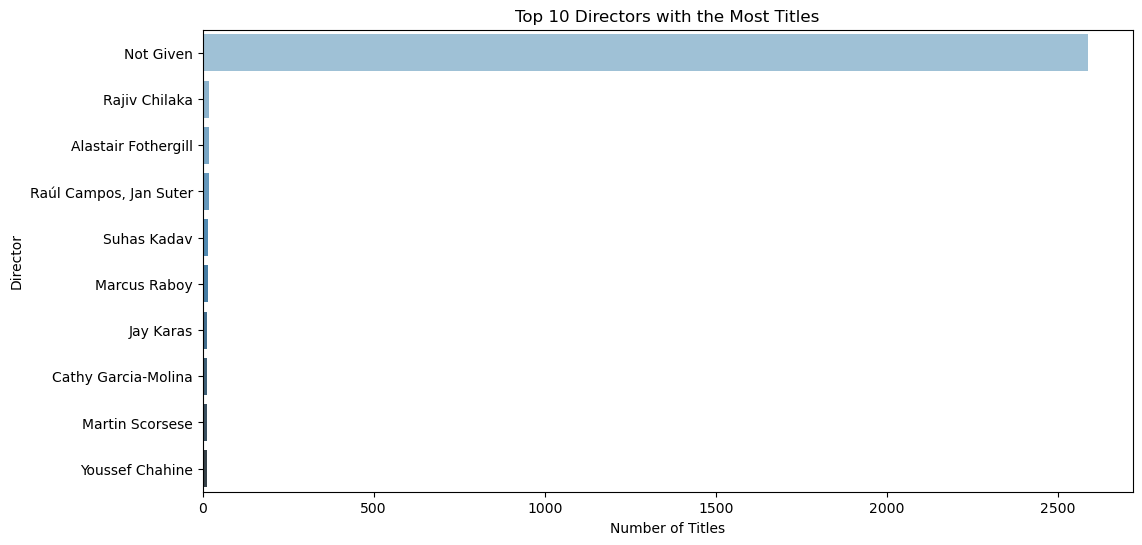

In [43]:
top_directors_df = top_directors.reset_index()
top_directors_df.columns = ['director', 'count']

plt.figure(figsize=(12,6))
sns.barplot(data=top_directors_df, x='count', y='director', hue='director', palette='Blues_d', legend=False)
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

In [53]:
# Generate word cloud

movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))


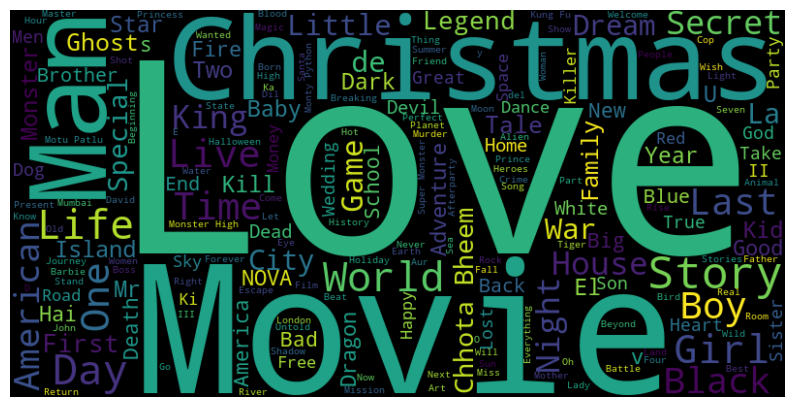

In [55]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [56]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV ...",2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021,9
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021,9
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International M...",2021,9


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  genres        8790 non-null   object        
 11  year_added    8790 non-null   int32         
 12  month_added   8790 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(9)
memory usage: 824.2+ KB


In [58]:
data.shape

(8790, 13)